#Gráfico de cascada

##Definición

Un **gráfico de cascada** (waterfall chart) es una forma de visualizar los datos que ayuda a comprender el efecto acumulativo al introducir valores positivos o negativos de manera secuencial. Esos valores intermedios pueden ser tanto en el tiempo como por categoría. 1

Los valores inicial y final están representados por la primera y la última columna de un gráfico de cascada. Parten del eje horizontal y están conectados por una serie de columnas flotantes relacionadas con los cambios positivos y negativos. A veces, estos elementos intermedios están atados con líneas. 2

##Gráfico simple

Para ver de lo que trata este gráfico, vamos a visualizarlo en un primer momento mediante un ejemplo con datos generados manualmente. 3

In [ ]:
#cargamos el paquete que nos permitirá realizar este tipo de gráficos
!pip install waterfallcharts
import waterfall_chart
import matplotlib.pyplot as plt

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=05055e3dcc24515990dc72eeba8575e945a13aa679743dabd91dafe6066d85fd
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


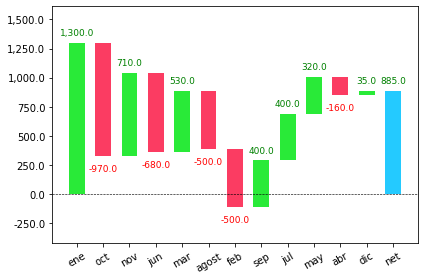

In [ ]:
#introducimos los valores que queremos que aparezcan en el gráfico
a = ['ene','feb','mar','abr','may','jun','jul','agost','sep','oct','nov','dic'] #nombres que aparecen en el eje horizontal
b = [1300,-500,530,-160,320,-680,400,-500,400,-970,710,35] #valores que toma cada barra del gráfico
waterfall_chart.plot(a, b, sorted_value=True);

Como se puede observar, a la cantidad inicial introducida se le van añadiendo o substrayendo el resto de cifras, indicando al final la cantidad que queda resultante. 

Los valores crecientes (positivos) están representados en verde, los decrecientes (negativos) en rojo y el neto (la suma de todos los valores que se han introducido) en azul.

Por último, al introducir `sorted_value=True` se muestra una línea que indica que el valor de la barra por encima de la línea tendrían una acumulación positiva y si sobrepasa la línea que ésta sería negativa.

##Gráfico con datos provenientes de un dataset

Una vez explicado en qué consiste el gráfico de cascada y visto un ejemplo sencillo, procedemos a emplear datos del INE para visualizar la utilidad práctica con datos reales.

Así, lo que se va a visualizar con este gráfico va a ser los distintos componentes que conforman el *Producto Interior Bruto por el lado de la demanda*:

\begin{align}
PIB = Cf + FMK + (X-M)
\end{align}

Es decir, el PIB por el lado de la demanda es el resultado de la suma del Gasto en consumo final (Cf), la Formación Bruta de Capital (FBK) y las Exportaciones netas (X-M).

In [53]:
#En este caso vamos a emplear una manera algo más avanzada de realizar el gráfico, ya que además de ofrecernos el gráfico va a ser interactivo: 
#si nos ponemos encima de las barras nos aparecerá la información sobre la misma y la acumulación.

#importamos los paquetes necesarios para cargar el dataset
import numpy as np
import pandas as pd
#importamos el paquete que nos permitirá desarrollar el gráfico
import plotly.graph_objects as go

In [54]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
ccaa = 'waterfall_chart_relativodem.xlsx'
data = pd.read_excel(ccaa, sheet_name='Datos', header = 0)

print (data)

Saving waterfall_chart_relativodem.xlsx to waterfall_chart_relativodem (1).xlsx
                    componente  cantidad   año
0          Gasto consumo final  362033.0  1995
1   Formación Bruta de Capital  103719.0  1995
2              Demanda interna       NaN  1995
3                Exportaciones  100533.0  1995
4                Importaciones  105697.0  1995
5      Producto Interior Bruto       NaN  1995
6          Gasto consumo final  846368.0  2008
7   Formación Bruta de Capital  315715.0  2008
8              Demanda interna       NaN  2008
9                Exportaciones  284308.0  2008
10               Importaciones  336850.0  2008
11     Producto Interior Bruto       NaN  2008
12         Gasto consumo final  819715.0  2012
13  Formación Bruta de Capital  190090.0  2012
14             Demanda interna       NaN  2012
15               Exportaciones  324335.0  2012
16               Importaciones  303041.0  2012
17     Producto Interior Bruto       NaN  2012
18         Gasto consumo fi

In [67]:
#ponemos las importaciones en negativo pues restan en el PIB
datos = data.set_index(['componente', 'año'])
datos.loc[['Importaciones']] = -abs(datos.loc[['Importaciones']])
#dejamos indexamos año para poder luego seleccionar los distintos años separadamente
datos_1 = datos.reset_index('componente')
datos_1.head(6)

,componente,cantidad
año,,
1995,Gasto consumo final,362033.0
1995,Formación Bruta de Capital,103719.0
1995,Demanda interna,NaN
1995,Exportaciones,100533.0
1995,Importaciones,-105697.0
1995,Producto Interior Bruto,NaN


In [68]:
#código del gráfico
fig = go.Figure(go.Waterfall(
    name = "2018", orientation = "v",
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = datos_1["componente"].loc[[2018]],
    textposition = "outside",
    text = ["+924163", "+246403", "", "+423097", "-390404", "PIB"],
    y = datos_1["cantidad"].loc[[2018]],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Producto Interior Bruto por el lado de la demanda 2018 (paso intermedio demanda interior)",
        showlegend = True
)


fig.show()

A diferencia del gráfico anterior, en este nos encontramos con la posibilidad de añadir resultados intermedios, como es el caso en este ejemplo de la demanda interna (que es la suma del gasto en consumo final y la formación bruta de capital). Además, colocando encima el ratón del gráfico también nos aparece información, siendo el gráfico interactivo a diferencia del primero más simple que hemos desarrollado. 4


###Comparación entre años

Asimismo, es posible realizar comparaciones entre diferentes años.
Como ejemplo, vamos a comparar los componentes del PIB de 2008 y 2018

In [71]:
fig = go.Figure()

fig.add_trace(go.Waterfall(
    name = "2008",
    x = datos_1["componente"].loc[[2008]],
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    y = datos_1["cantidad"].loc[[2008]],
    base = 100000
))


fig.add_trace(go.Waterfall(
    name = "2018",
    x = datos_1["componente"].loc[[2018]],
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    y = datos_1["cantidad"].loc[[2018]],
    base = 100000
))


fig.update_layout(
    waterfallgroupgap = 0.5,
)

fig.show()

Como podemos observar, este gráfico es bastante útil para hacer comparaciones a simple vista. De este gráfico se desprende que los valores de los componentes han sido mayores en 2018 que 2008. También deja patente, que en ambas ocasiones, tanto las exportaciones como las importaciones son bastantes similares (caso habitual de españa de casi no tener superávit comercial)

Igualmente, podemos ir más allá. Vamos a ver, por ejemplo, distintos años coincidientes con periodos de crisis o de bonanza:

*   1995-2008: gran expansión económica.
*   2008-2012: tiene lugar la crisis financiera y el retroceso económico.
*   2013-2019: recuperación económica
*   2020: crisis del coronavirus

(para comparar mejor se pueden deseleccionar de la leyenda los periodos que no interesen)




In [75]:
#partimos del dataset una vez puesto negativas las importaciones
#eliminamos la variable demanda interna porque vamos a omitir ese paso intermedio
datos_2 = datos.drop('Demanda interna')
datos_2 = datos_2.reset_index('componente')
datos_2.head(6)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,componente,cantidad
año,,
1995,Gasto consumo final,362033.0
1995,Formación Bruta de Capital,103719.0
1995,Exportaciones,100533.0
1995,Importaciones,-105697.0
1995,Producto Interior Bruto,NaN
2008,Gasto consumo final,846368.0


In [76]:
#hacemos el gráfico
fig = go.Figure()

fig.add_trace(go.Waterfall(
    name = "1995",
    x = datos_2["componente"].loc[[1995]],
    measure = ["relative", "relative", "relative", "relative", "total"],
    y = datos_2["cantidad"].loc[[1995]],
    base = 100000
))


fig.add_trace(go.Waterfall(
    name = "2008",
    x = datos_2["componente"].loc[[2008]],
    measure = ["relative", "relative", "relative", "relative", "total"],
    y = datos_2["cantidad"].loc[[2008]],
    base = 100000
))

fig.add_trace(go.Waterfall(
    name = "2012",
    x = datos_2["componente"].loc[[2012]],
    measure = ["relative", "relative", "relative", "relative", "total"],
    y = datos_2["cantidad"].loc[[2012]],
    base = 100000
))

fig.add_trace(go.Waterfall(
    name = "2019",
    x = datos_2["componente"].loc[[2019]],
    measure = ["relative", "relative", "relative", "relative", "total"],
    y = datos_2["cantidad"].loc[[2019]],
    base = 100000
))

fig.add_trace(go.Waterfall(
    name = "2020",
    x = datos_2["componente"].loc[[2020]],
    measure = ["relative", "relative", "relative", "relative", "total"],
    y = datos_2["cantidad"].loc[[2020]],
    base = 100000
))

fig.update_layout(
    waterfallgroupgap = 0.2,
)

fig.show()

1. Wikipedia
2. https://ichi.pro/es/crear-un-grafico-de-cascada-en-python-242424293018437
3. https://www.machinelearningplus.com/waterfall-plot-in-python/
4. https://plotly.com/python/waterfall-charts/